# Import required packages

In [2]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')

# Exercise 1

In [9]:
a_list = list(range(6))
b_list = a_list[1:4]
print('a before:', a_list)
print('b before:', b_list)
b_list[0] = 1000
print('a after:', a_list)
print('b after:', b_list)

a before: [0, 1, 2, 3, 4, 5]
b before: [1, 2, 3]
a after: [0, 1, 2, 3, 4, 5]
b after: [1000, 2, 3]


In [12]:
a_list = np.arange(6)
b_list = a_list[1:4]
print('a before:', a_list)
print('b before:', b_list)
b_list[0] = 1000
print('a after:', a_list)
print('b after:', b_list)

a before: [0 1 2 3 4 5]
b before: [1 2 3]
a after: [   0 1000    2    3    4    5]
b after: [1000    2    3]


In [13]:
a_list = np.arange(6)
b_list = np.array(a_list[1:4])
print('a before:', a_list)
print('b before:', b_list)
b_list[0] = 1000
print('a after:', a_list)
print('b after:', b_list)

a before: [0 1 2 3 4 5]
b before: [1 2 3]
a after: [0 1 2 3 4 5]
b after: [1000    2    3]


# Exercise 2

In [15]:
x = np.arange(1,7)
x = x.reshape(-1, 2)
print('Array x: \n', x)
print('Shape of x:', x.shape)

Array x: 
 [[1 2]
 [3 4]
 [5 6]]
Shape of x: (3, 2)


In [14]:
x = np.arange(1,8)
x = x.reshape(-1, 2)
print('Array x: \n', x)
print('Shape of x:', x.shape)

ValueError: cannot reshape array of size 7 into shape (2)

In [16]:
x = np.arange(1,9)
x = x.reshape(-1, 2)
print('Array x: \n', x)
print('Shape of x:', x.shape)

Array x: 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]
Shape of x: (4, 2)


In [17]:
#Condition for n which no error is ereturned --> n is a common multiple of parameters in the new shape

# Exercise 3

In [25]:
A = np.array([0, 1, 2])
B = np.array([3, 0, 0])
aNorm = np.linalg.norm(A)
bNorm = np.linalg.norm(B)
abDot = np.dot(A, B)
np.arccos(np.dot(A, B)/(aNorm * bNorm)) == np.pi/2

True

# Exercise 4 - Linear Regression Exercise

## Simulation of mock data 

Suppose the independent variable $x$ and the response variable $y$ follow a linear relationship, i.e.:

$$ y  = \mathbf{\beta}^\top \cdot \mathbf{x} = \beta_0 + \beta_1 x$$

where

$$
\mathbf{\beta}
=
\begin{bmatrix} 
\beta_0 \\
\beta_1
\end{bmatrix} 
\text{     and,    } 
\mathbf{x}
=
\begin{bmatrix} 
1 \\
x
\end{bmatrix} 
$$


$\beta_0$ is the intercept term and $\beta_1$ is the slope term.

We want to create some mock data $(X,Y)$ of $N=1000$ data points with certain amount of Gaussian noise $\epsilon \sim \mathcal{N} (0,1) $.


Where 

$$
X
=
\begin{bmatrix}
\mathbf{x_1}, 
\mathbf{x_2}, 
\cdots,
\mathbf{x_N}
\end{bmatrix}
=
\begin{bmatrix}
1 & 1& & 1\\
& &\cdots &\\
x_1 & x_2& & x_N
\end{bmatrix}
\text{         and ,     }
Y
=
\begin{bmatrix}
y_1,
y_2,
\cdots,
y_N
\end{bmatrix}
$$




and

$$ y_i = \mathbf{\beta}^\top \cdot \mathbf{x}_i + \epsilon_i = \beta_0 + \beta_1 x_i + \epsilon_i $$ for $i=1 \ldots N$


Let's assume $\beta_0 = 3$ and $\beta_1 = 10$.

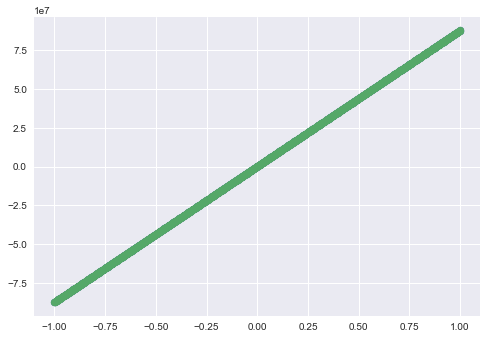

In [3]:
N = 1000 #sample size

true_beta = np.array([127890,87654321])
x = np.linspace(-1,1,N) #perfect data
x1 = np.vstack([np.ones(x.shape), x])  #mock data

eps = np.random.normal(0,1,N)

y = np.matmul(true_beta, x1) + eps

plt.scatter(x,y)
plt.scatter(x, np.matmul(true_beta, x1))

## Linear Regression

Suppose that we know $x$ and $y$ follow a linear relationship, but we do not know the value of $\mathbf{\beta}$. 
We want to build a linear model $f(\mathbf{x}; \beta)$ and estimate the value of $\mathbf{\beta}$ from data samples $(x_i,y_i)$, so that given any input $\mathbf{x}_i$, we can make a prediction $\hat{y_i}$:


$$ \hat{y_i} = f(\mathbf{x}_i; \beta) = \mathbf{\beta}^\top \cdot \mathbf{x}_i  = \beta_0 + \beta_1 x_i  $$




Define the mean squared error loss function which measure the error between our predictions and the actual values:

$$ l = \frac{1}{N} \sum_{i=1}^{N} (y_i-\hat{y_i})^2 $$

We can estimate the value of $\beta$ by finding the minimizer which minimizes $l$ using the Newton-Raphson algorithm.

$$
\mathbf{\hat{\beta}}
=
\text{argmin}_\beta \   l(\beta)
$$

## Gradient and Hessian

To use the Newton-Raphson algorithm, we need to calculate the gradient and Hessian of the loss function, which are the first order and second order partial derivatives of the loss function respectively.

### The first order partial derivatives of the loss function are:

$$
\begin{align}
\frac{\partial l}{\partial \beta_0} &= -\frac{2}{N} \sum_{i=1}^N (y_i-\hat{y_i}) \\
\frac{\partial l}{\partial \beta_1} &= -\frac{2}{N} \sum_{i=1}^N x_i \cdot (y_i-\hat{y_i}) 
\end{align}
$$

### The gradient of the loss function is: 

$$
\nabla l
=
\begin{bmatrix} 
\frac{\partial l}{\partial \beta_0} \\ 
\frac{\partial l}{\partial \beta_1}
\end{bmatrix}
= 
-2 \cdot
\begin{bmatrix} 
\frac{1}{N} \sum_{i=1}^N (y_i -\hat{y_i}) \\ 
\frac{1}{N} \sum_{i=1}^N x_i \cdot (y_i -\hat{y_i})
\end{bmatrix}
$$

### The second order partial derivatives of the loss function are:

$$ 
\begin{align}
\frac{\partial^2 l}{\partial \beta_0^2} &= 2 \\
\frac{\partial^2 l}{\partial \beta_1^2} &=  \frac{2}{N} \sum_{i=1}^N x_i^2 \\
\frac{\partial^2 l}{\partial \beta_0 \partial \beta_1}  
&=  
\frac{\partial^2 l}{\partial \beta_1 \partial \beta_0}
=
\frac{2}{N} \sum_{i=1}^N x_i 
\end{align}
$$

### The Hessian of the loss function is: 

$$ 
H 
= 
\begin{bmatrix} 
\frac{\partial^2 l}{\partial \beta_0^2} & \frac{\partial^2 l}{\partial \beta_0 \partial \beta_1} \\ \frac{\partial^2 l}{\partial \beta_1 \partial \beta_0} & \frac{\partial^2 l}{\partial \beta_1^2} 
\end{bmatrix} 
= 
2 \cdot
\begin{bmatrix}
1 & \frac{1}{N} \sum_{i=1}^N x_i \\
\frac{1}{N} \sum_{i=1}^N x_i & \frac{1}{N} \sum_{i=1}^N x_i^2
\end{bmatrix}
$$

## Newton-Raphson Algorithm (2nd Order Optimization)








Define the functions for our linear model and the loss function

In [4]:
# Define the function for our linear model
def model(param,x1):
    return np.matmul(param, x1)

# Define the function for our loss function
def loss_func(param, x1, y): 
    yHat = model(param, x1)
    return np.mean((y - yHat)**2)

Newton-Raphson algorithm:

1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - H^{-1} \mathbf{\nabla} l(\beta_k) $$
     
     
3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 


Hint:
1. You can use np.abs(delta) to compute the absolute value of delta


In [18]:
# %%timeit
beta = np.random.normal(0,1,2) #initialize beta                         
tol = 1e-7 #toloerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1
h = 2 * np.array([[1,        np.mean(x)],
                [np.mean(x), np.mean(x**2)]]) #Hessian of the loss function

while np.abs(delta) >= tol:
    yHat = model(beta, x1)
    g = -2 * np.array([np.mean(y - yHat),
                        np.mean(x*(y - yHat))]) #Gradient of the loss function
    prevLoss = loss_func(beta, x1, y)
    beta -= np.linalg.solve(h, g) #Solve for beta using np.linalg.solve()
    currLoss = loss_func(beta, x1, y)
    delta = currLoss - prevLoss


159 µs ± 174 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [19]:
# %%timeit
beta = np.random.normal(0,1,2) #initialize beta                         
tol = 1e-7 #toloerance
delta = 1 #a variable to store the value for l(\beta_{k+1}) - l(\beta_{k}), initialized to be 1
h = 2 * np.array([[1,        np.mean(x)],
                [np.mean(x), np.mean(x**2)]]) #Hessian of the loss function
hInv = np.linalg.inv(h) #Define the inverse of the hessian

while np.abs(delta) >= tol:
    yHat = model(beta, x1)
    g = -2 * np.array([np.mean(y - yHat),
                        np.mean(x*(y - yHat))]) #Gradient of the loss function
    prevLoss = loss_func(beta, x1, y)
    beta -= np.matmul(hInv, g) #Directly multiply the inverse of the hessian with the gradient
    currLoss = loss_func(beta, x1, y)
    delta = currLoss - prevLoss


151 µs ± 290 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Visualizing the result

The estimated value for beta is: [  127889.97218868 87654320.90539695]
The true value for beta is: [  127890 87654321]
2.945221844186108e-11


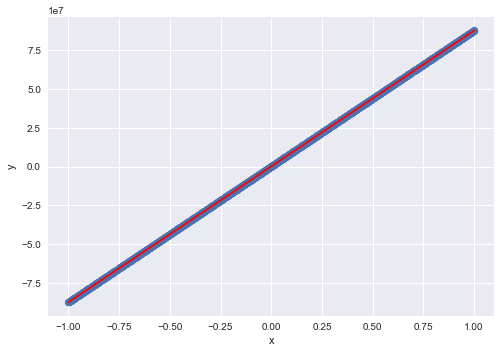

In [20]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

## Gradient Descent Algorithm (1st Order Optimization) [Optional Exercise]

Gradient descent algorithm:


1. Initialize $\mathbf{\beta}$ by sampling from the standard normal distribution  $\mathcal{N} (0,1)$ 



2. At each iteration $k$, update the parameters $\mathbf{\beta}$ by this equation: \
   $$ \mathbf{\beta_{k+1}} = \mathbf{\beta_k} - \alpha \mathbf{\nabla} l(\beta_k) $$
   where $\alpha \sim 10^{-1}$ is the step size



3. Stop the algorithm when $|l(\beta_{k+1}) - l(\beta_k)| < \text{tolerance}$, we can use a small number, i.e. $10^{-7}$, as our tolerance value 



In [31]:
beta = np.random.normal(0,1,2)

alpha = .75
tol = 1e-7
delta = 1

while np.abs(delta) >= tol:
    yHat = model(beta, x1)
    g = -2 * np.array([np.mean(y - yHat),
                        np.mean(x*(y - yHat))])
    prevLoss = loss_func(beta, x1, y)
    beta -= alpha * g
    currLoss = loss_func(beta, x1, y)
    delta = currLoss - prevLoss


2.13 ms ± 8.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Visualizing the result

The estimated value for beta is: [  127889.97218868 87654320.90271816]
The true value for beta is: [  127890 87654321]


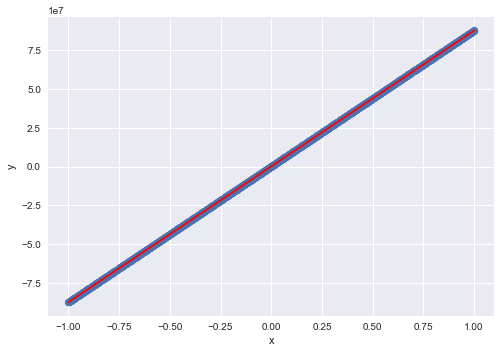

In [32]:
print('The estimated value for beta is:', beta)
print('The true value for beta is:', true_beta)

y_pred = np.matmul(beta,x1)

plt.plot(x, y_pred, 'r')
plt.scatter(x,y)
plt.ylabel('y')
plt.xlabel('x')
plt.show()